In [50]:
# import nessesary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  

In [51]:
# load the dataset of iris from seaborn library
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
df.shape

(150, 5)

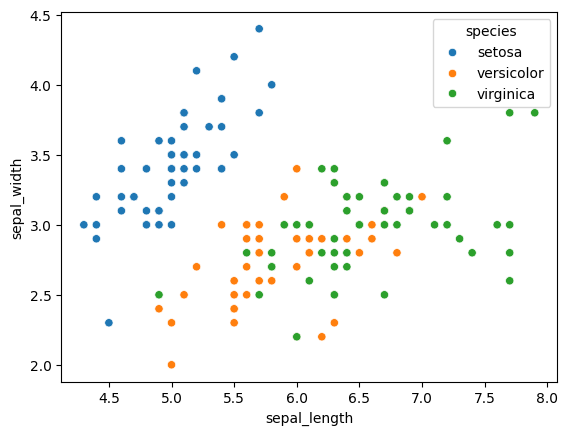

In [52]:
# create a scatter plot for all the species 
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', data = df)
plt.show()

This is how we can create a scatter plot for all the species.

-----
# Descision tree model

In [53]:
%%time
# preprocess the data 
# using label encoder to convert categorical data into numerical data
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# separate the data into to features and labels 
X = df.drop('species', axis = 1)
y = df['species']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# call the model 
model = DecisionTreeClassifier()

# train the model 
model.fit(X_train, y_train)

# predicting the model 
y_pred = model.predict(X_test)

# evaluate the model 
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'micro'))
print(recall_score(y_test, y_pred, average = 'micro'))
print(f1_score(y_test, y_pred, average = 'micro'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
1.0
1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
CPU times: total: 31.2 ms
Wall time: 31.4 ms


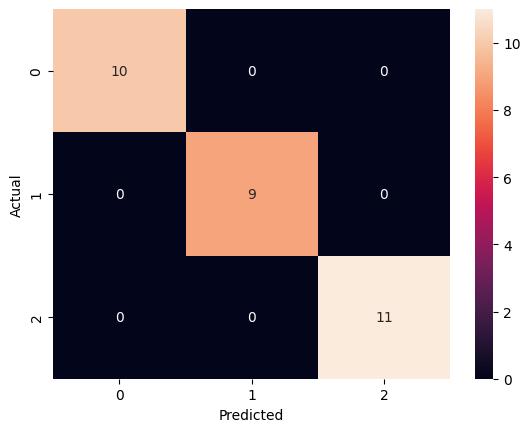

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.show()

-------
# Random forest model (Bagging Ensemble method)

In [55]:
%%time
# call the model 
model = RandomForestClassifier()

# train the model 
model.fit(X_train, y_train)

# predicting the model 
y_pred = model.predict(X_test)

# evaluate the model 
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'micro'))
print(recall_score(y_test, y_pred, average = 'micro'))
print(f1_score(y_test, y_pred, average = 'micro'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
1.0
1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
CPU times: total: 125 ms
Wall time: 127 ms


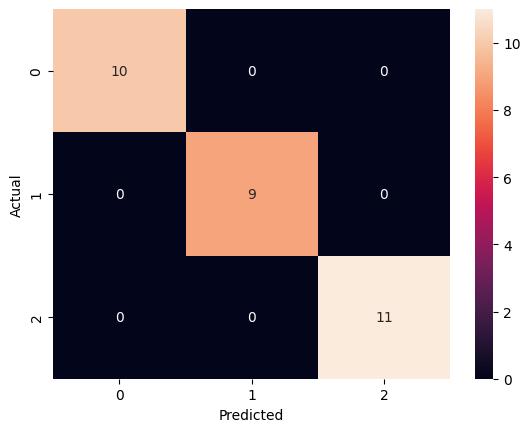

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.show()

-------
# XGBoost(Boosting Ensemble method)

In [ ]:
%%time
# call the model 
model = XGBClassifier()

# train the model 
model.fit(X_train, y_train)

# predicting the model
y_pred = model.predict(X_test)

# evaluate the model 
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
1.0
1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
CPU times: total: 375 ms
Wall time: 141 ms


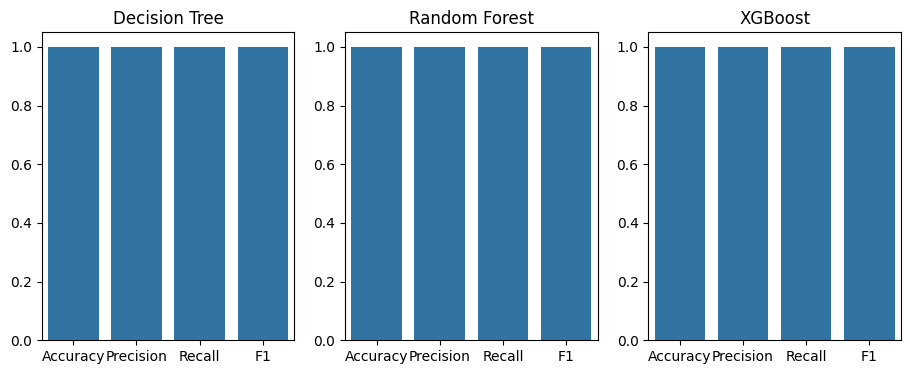

In [58]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()